# Introduction to regression with Neural Networks in TensorsFlow

There are many definiations for a regression problem but in our case, we are
going to simplify it: predicting a numerical vairable based on some other combination
of varibales, even shorter... predicting a number


In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


# Creating data to view and fit



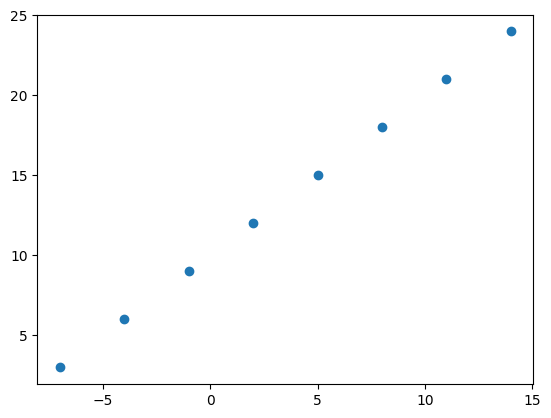

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0, 5.0,8.0,11.0,14.0])

 # Create labels

y = np.array([3.0,6.0,9.0,12.0, 15.0, 18.0,21.0,24.0])

# Visualize it

plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [5]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
X[1],y[1]

(np.float64(-4.0), np.float64(6.0))

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

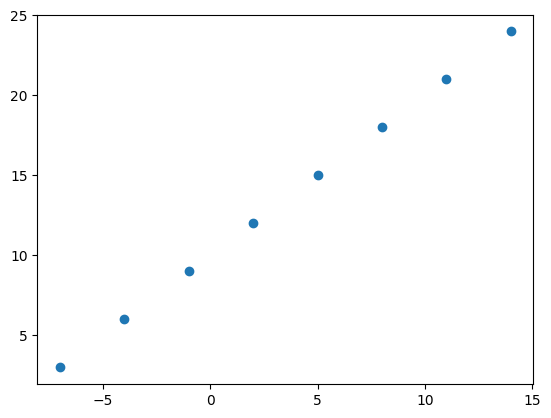

In [13]:
plt.scatter(X,y)

# Steps in modeling with TensorFlow
1. Creating a model - define the input and output layes, as well as
the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in others words,
                                                 the function which tells our model how wrong it is) and the optimizer(tells our model
                                                                                                                      how to improve the patters its leaning) and evluation matrix
3. Fitting a model - letting the model try to find patterns between X & y(features and labels)                                                                                                                      (what we can use to interpret the performance of model).config/




In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

model =tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Set the random seed
tf.random.set_seed(42)


#1. Create a model using the sequentail API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),# this is short for stochasitc gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: Input 0 of layer "dense_5" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)

In [19]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

In [23]:
y_pred + 1

NameError: name 'y_pred' is not defined